In [151]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

In [152]:
df = pd.read_csv('train.csv')

In [153]:
#check the data
df.head()

,RecordID,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,13783,49,admin.,divorced,professional.course,no,yes,yes,cellular,aug,mon,4457,1,115,2,failure,1.4,92.479703,-35.498996,0.705058,4990.198481,no
1,23986,52,services,married,high.school,unknown,yes,no,cellular,may,mon,4797,1,402,2,nonexistent,-1.8,93.439161,-39.331320,4.245479,5144.563621,yes
2,20663,46,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,wed,169,1,999,1,failure,-1.8,93.075000,-47.100000,1.445000,5099.100000,no
3,13958,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,fri,376,28,999,0,nonexistent,1.4,93.444000,-36.100000,4.967000,5228.100000,yes
4,28184,47,admin.,single,university.degree,no,no,no,cellular,nov,tue,3033,1,252,4,success,-3.4,94.352376,-33.073620,1.208702,5025.420036,no


In [154]:
#check if there are any NaN values
df.isna().sum()

RecordID          0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribe         0
dtype: int64

In [155]:
#check count of rows
df.count()

RecordID          22500
age               22500
job               22500
marital           22500
education         22500
default           22500
housing           22500
loan              22500
contact           22500
month             22500
day_of_week       22500
duration          22500
campaign          22500
pdays             22500
previous          22500
poutcome          22500
emp.var.rate      22500
cons.price.idx    22500
cons.conf.idx     22500
euribor3m         22500
nr.employed       22500
subscribe         22500
dtype: int64

In [156]:
#check data types
df.dtypes

RecordID            int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribe          object
dtype: object

In [157]:
#check boolean columns

bool_cols = [col for col in df if np.isin(df[col].dropna().unique(), [0, 1]).all()]
bool_cols

[]

In [158]:
#check the unique values for housing; note there are several 'unknown'
df.housing.unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [159]:
#check the unique values for loan; note there are several 'unknown'
df.loan.unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [160]:
#check the unique values for default; note there are several 'unknown'
df.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [161]:
#Change 'yes', 'no' values to '1', '0'
map_yn = {'yes' : 1, 'no' : 0}
df.subscribe = df.subscribe.map(map_yn)
df.housing = df.housing.map(map_yn)
df.loan = df.loan.map(map_yn)
df.default = df.default.map(map_yn)

In [162]:
#check if there are any NaN values
df.isna().sum()

RecordID             0
age                  0
job                  0
marital              0
education            0
default           4860
housing            886
loan               889
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribe            0
dtype: int64

In [163]:
df.count()

RecordID          22500
age               22500
job               22500
marital           22500
education         22500
default           17640
housing           21614
loan              21611
contact           22500
month             22500
day_of_week       22500
duration          22500
campaign          22500
pdays             22500
previous          22500
poutcome          22500
emp.var.rate      22500
cons.price.idx    22500
cons.conf.idx     22500
euribor3m         22500
nr.employed       22500
subscribe         22500
dtype: int64

In [164]:
#copy to a new dataframe to make changes
df1 = df.copy(deep= True)

In [165]:
df1.count()

RecordID          22500
age               22500
job               22500
marital           22500
education         22500
default           17640
housing           21614
loan              21611
contact           22500
month             22500
day_of_week       22500
duration          22500
campaign          22500
pdays             22500
previous          22500
poutcome          22500
emp.var.rate      22500
cons.price.idx    22500
cons.conf.idx     22500
euribor3m         22500
nr.employed       22500
subscribe         22500
dtype: int64

In [166]:
#check all the columns and the first rows of the data
pd.set_option('display.max_columns', None)
df1.head()

,RecordID,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,13783,49,admin.,divorced,professional.course,0.0,1.0,1.0,cellular,aug,mon,4457,1,115,2,failure,1.4,92.479703,-35.498996,0.705058,4990.198481,0
1,23986,52,services,married,high.school,NaN,1.0,0.0,cellular,may,mon,4797,1,402,2,nonexistent,-1.8,93.439161,-39.331320,4.245479,5144.563621,1
2,20663,46,blue-collar,divorced,basic.9y,0.0,0.0,0.0,cellular,apr,wed,169,1,999,1,failure,-1.8,93.075000,-47.100000,1.445000,5099.100000,0
3,13958,26,entrepreneur,single,high.school,1.0,1.0,1.0,cellular,aug,fri,376,28,999,0,nonexistent,1.4,93.444000,-36.100000,4.967000,5228.100000,1
4,28184,47,admin.,single,university.degree,0.0,0.0,0.0,cellular,nov,tue,3033,1,252,4,success,-3.4,94.352376,-33.073620,1.208702,5025.420036,0


In [167]:
df1.columns

Index(['RecordID', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribe'],
      dtype='object')

In [168]:
#check how many unique jobs
df1.job.unique()

array(['admin.', 'services', 'blue-collar', 'entrepreneur', 'management',
       'technician', 'housemaid', 'self-employed', 'unemployed',
       'retired', 'student', 'unknown'], dtype=object)

In [169]:
#checking the correlation matrix
df1.corr()
#Seems not a strong correlation between subscribe and other variables

,RecordID,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
RecordID,1.000000,0.001750,-0.018274,0.082041,0.004947,0.010348,-0.043917,-0.097207,0.071292,-0.835081,-0.391390,-0.132593,-0.541810,-0.397919,0.268302
age,0.001750,1.000000,0.214069,-0.004093,0.045274,0.005017,0.239789,-0.009640,0.005006,0.001689,-0.005674,0.054529,0.008518,0.000972,0.093892
default,-0.018274,0.214069,1.000000,-0.014403,0.107469,-0.000245,0.539026,0.011028,-0.006295,0.018136,0.006215,-0.000855,0.003291,0.015043,0.160437
housing,0.082041,-0.004093,-0.014403,1.000000,0.041510,-0.003149,-0.014260,-0.007079,0.008255,-0.055340,-0.045276,-0.021476,-0.034640,-0.022219,0.004047
loan,0.004947,0.045274,0.107469,0.041510,1.000000,0.000416,0.123182,-0.008696,-0.010697,0.003033,-0.003001,-0.005691,-0.006686,0.004179,0.023371
duration,0.010348,0.005017,-0.000245,-0.003149,0.000416,1.000000,0.000496,-0.527144,0.542028,-0.013169,-0.055921,0.113328,-0.182963,-0.327792,0.037470
campaign,-0.043917,0.239789,0.539026,-0.014260,0.123182,0.000496,1.000000,0.011605,-0.009045,0.065415,0.028924,0.011142,0.034502,0.038622,0.165172
pdays,-0.097207,-0.009640,0.011028,-0.007079,-0.008696,-0.527144,0.011605,1.000000,-0.559691,0.094031,0.071983,-0.124029,0.275094,0.410752,-0.100082
previous,0.071292,0.005006,-0.006295,0.008255,-0.010697,0.542028,-0.009045,-0.559691,1.000000,-0.072764,-0.080095,0.092646,-0.255666,-0.385008,0.032854
emp.var.rate,-0.835081,0.001689,0.018136,-0.055340,0.003033,-0.013169,0.065415,0.094031,-0.072764,1.000000,0.414045,0.103430,0.625127,0.476833,-0.270444


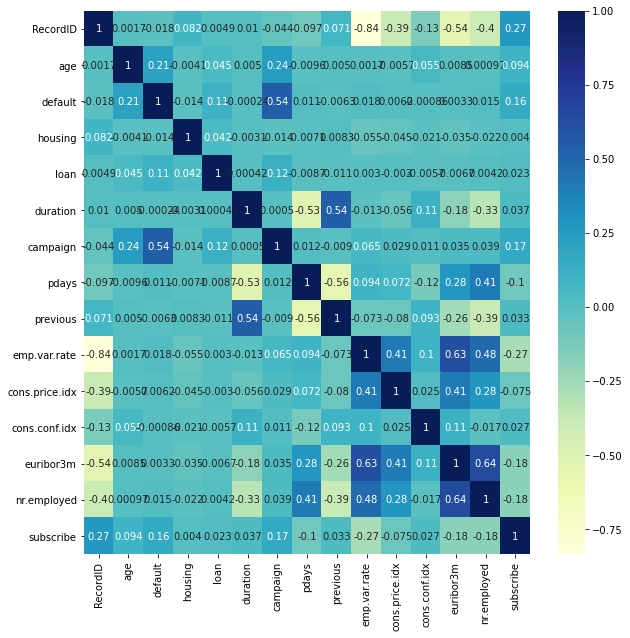

In [170]:
fig, ax = plt.subplots(figsize=(10,10))    
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [171]:
df1.describe()

,RecordID,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
count,22500.000000,22500.000000,17640.000000,21614.000000,21611.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,15011.876889,40.904489,0.021485,0.535209,0.169219,1146.554311,3.857244,774.562533,1.316444,0.078529,93.538746,-39.872633,3.307811,5138.567351,0.131200
std,8679.392766,12.026945,0.144999,0.498770,0.374954,1430.790448,7.210891,326.020060,1.918733,1.573831,0.647698,5.692010,1.608627,81.748896,0.337626
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,7483.750000,32.000000,0.000000,0.000000,0.000000,144.000000,1.000000,558.750000,0.000000,-1.800000,92.969840,-43.643788,1.410000,5081.293851,0.000000
50%,15032.500000,38.000000,0.000000,1.000000,0.000000,354.000000,2.000000,999.000000,0.000000,1.100000,93.485726,-41.522404,3.964364,5165.319989,0.000000
75%,22514.500000,48.000000,0.000000,1.000000,0.000000,1877.000000,3.000000,999.000000,2.000000,1.400000,93.994000,-36.100000,4.864000,5218.069326,0.000000
max,30000.000000,98.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [172]:
#check for duplicate values in Record ID
boolean = not df1['RecordID'].is_unique      # True (credit to @Carsten)
boolean = df1['RecordID'].duplicated().any() 

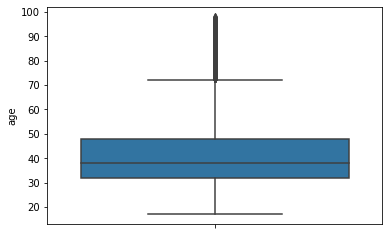

In [173]:
#boxplot for outlier detection for age
sns.boxplot(y=df1.age, data=df1)
plt.show()

In [174]:
#Use 95% quantile to remove outliers
q_cutoff = df1['age'].quantile(0.95)
mask = df1['age'] < q_cutoff
df1 = df1[mask]

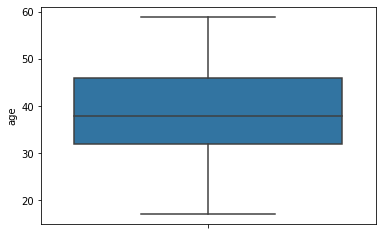

In [175]:
#Check age distribution
sns.boxplot(y=df1.age, data=df1)
plt.show()

In [176]:
df1.count()

RecordID          21316
age               21316
job               21316
marital           21316
education         21316
default           16712
housing           20643
loan              20617
contact           21316
month             21316
day_of_week       21316
duration          21316
campaign          21316
pdays             21316
previous          21316
poutcome          21316
emp.var.rate      21316
cons.price.idx    21316
cons.conf.idx     21316
euribor3m         21316
nr.employed       21316
subscribe         21316
dtype: int64

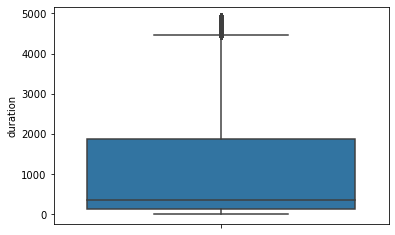

In [177]:
#boxplot for outlier detection for duration
sns.boxplot(y=df1.duration, data=df1)
plt.show()

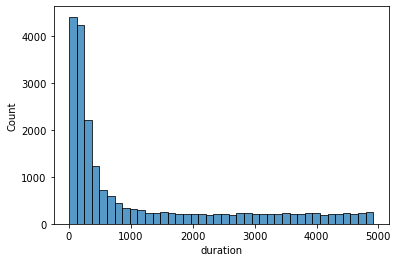

In [178]:
sns.histplot(x=df1.duration, data= df1)
plt.show()
#long tail, will not be able to remove outliers

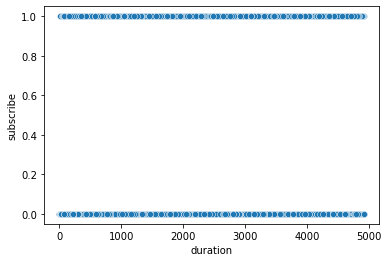

In [179]:
#before reoving tail end, check to see if the tail end values have both 1/0 values for subscribers
sns.scatterplot(x= df1.duration, y= df1.subscribe, data=df1)
plt.show()
#Both high and low values of duration has subscribers

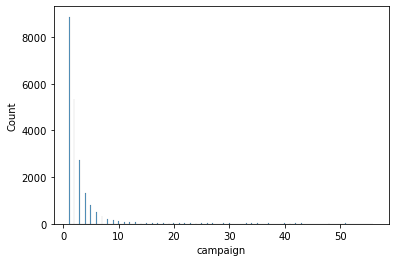

In [180]:
#check the histogram for campaign
sns.histplot(x=df1.campaign, data=df1)
plt.show()

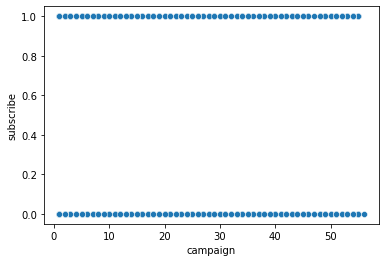

In [181]:
sns.scatterplot(x= df1.campaign, y= df1.subscribe, data=df1)
plt.show()

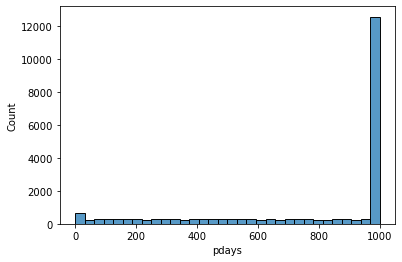

In [182]:
#check histogram for pdays
sns.histplot(x=df1.pdays, data=df1)
plt.show()

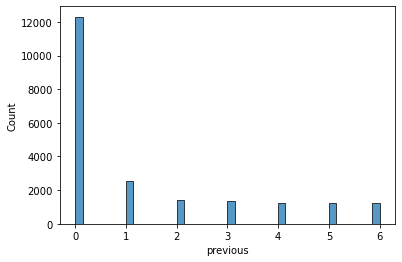

In [183]:
#check histogram for previous
sns.histplot(x=df1.previous, data= df1)
plt.show()

In [184]:
df1.count()

RecordID          21316
age               21316
job               21316
marital           21316
education         21316
default           16712
housing           20643
loan              20617
contact           21316
month             21316
day_of_week       21316
duration          21316
campaign          21316
pdays             21316
previous          21316
poutcome          21316
emp.var.rate      21316
cons.price.idx    21316
cons.conf.idx     21316
euribor3m         21316
nr.employed       21316
subscribe         21316
dtype: int64

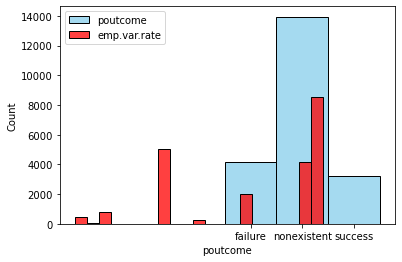

In [185]:
#check histogram for poutcome and emp.var.rate
sns.histplot(data=df1, x="poutcome", color="skyblue", label="poutcome")
sns.histplot(data=df1, x="emp.var.rate", color="red", label="emp.var.rate")
plt.legend()
plt.show()

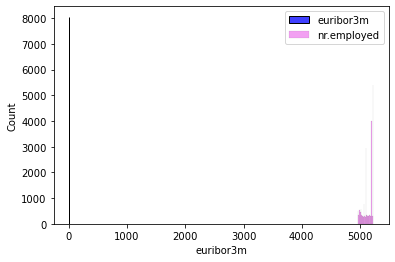

In [186]:
#check histogram for euribor3m and nr.employed
sns.histplot(data=df1, x="euribor3m", color="blue", label="euribor3m")
sns.histplot(data=df1, x="nr.employed", color="violet", label="nr.employed")
plt.legend()
plt.show()

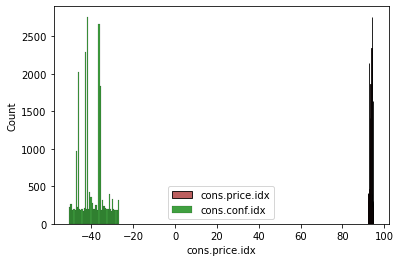

In [187]:
#check histogram for cons.price.inde and cons.conf.index
sns.histplot(data=df1, x="cons.price.idx", color="brown", label="cons.price.idx")
sns.histplot(data=df1, x="cons.conf.idx", color="green", label="cons.conf.idx")
plt.legend()
plt.show()

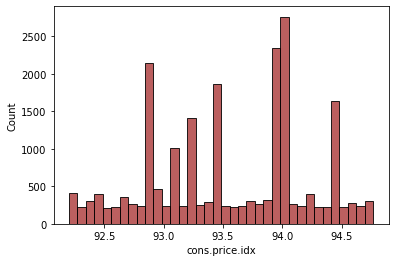

In [188]:
sns.histplot(data=df1, x="cons.price.idx", color="brown", label="cons.price.idx")
plt.show()

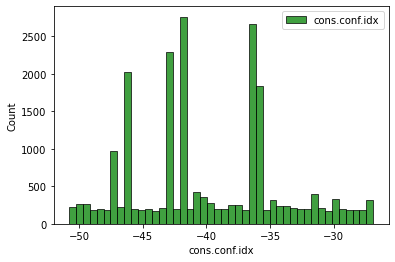

In [189]:
#check histogram for consumer confidence index
sns.histplot(data=df1, x="cons.conf.idx", color="green", label="cons.conf.idx")
plt.legend()
plt.show()

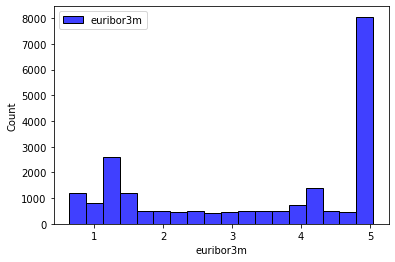

In [190]:
sns.histplot(data=df1, x="euribor3m", color="blue", label="euribor3m")
plt.legend()
plt.show()

In [191]:
df1.count()

RecordID          21316
age               21316
job               21316
marital           21316
education         21316
default           16712
housing           20643
loan              20617
contact           21316
month             21316
day_of_week       21316
duration          21316
campaign          21316
pdays             21316
previous          21316
poutcome          21316
emp.var.rate      21316
cons.price.idx    21316
cons.conf.idx     21316
euribor3m         21316
nr.employed       21316
subscribe         21316
dtype: int64

In [192]:
df1.isna().sum()

RecordID             0
age                  0
job                  0
marital              0
education            0
default           4604
housing            673
loan               699
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribe            0
dtype: int64

In [193]:
#dropping all the NaN values
df1.dropna(inplace= True)

In [194]:
df1.isna().sum()

RecordID          0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribe         0
dtype: int64

In [195]:
df1.count()

RecordID          16100
age               16100
job               16100
marital           16100
education         16100
default           16100
housing           16100
loan              16100
contact           16100
month             16100
day_of_week       16100
duration          16100
campaign          16100
pdays             16100
previous          16100
poutcome          16100
emp.var.rate      16100
cons.price.idx    16100
cons.conf.idx     16100
euribor3m         16100
nr.employed       16100
subscribe         16100
dtype: int64

Exploratory Data Analysis

In [196]:
df1.dtypes

RecordID            int64
age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribe           int64
dtype: object

In [197]:
#assign dataframe column 'subscribe' to new dataframe y
y = df1['subscribe']
y.head()

0    0
2    0
3    1
4    0
5    0
Name: subscribe, dtype: int64

In [198]:
#drop column subcribe from df1
df1.drop(columns= 'subscribe', inplace= True)

In [199]:
df1.head()

,RecordID,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,13783,49,admin.,divorced,professional.course,0.0,1.0,1.0,cellular,aug,mon,4457,1,115,2,failure,1.4,92.479703,-35.498996,0.705058,4990.198481
2,20663,46,blue-collar,divorced,basic.9y,0.0,0.0,0.0,cellular,apr,wed,169,1,999,1,failure,-1.8,93.075000,-47.100000,1.445000,5099.100000
3,13958,26,entrepreneur,single,high.school,1.0,1.0,1.0,cellular,aug,fri,376,28,999,0,nonexistent,1.4,93.444000,-36.100000,4.967000,5228.100000
4,28184,47,admin.,single,university.degree,0.0,0.0,0.0,cellular,nov,tue,3033,1,252,4,success,-3.4,94.352376,-33.073620,1.208702,5025.420036
5,10016,47,management,married,unknown,0.0,0.0,0.0,cellular,jul,thu,841,1,10,3,nonexistent,1.4,92.636660,-30.745182,3.461047,5133.810899


In [200]:
#drop RecordID as it has no significance in modeling
df1.drop(columns= 'RecordID', inplace= True)

In [201]:
#Standardize all continuous numeric variables

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1[['age']])
df1['normalized_age'] = scaler.transform(df1[['age']])
df1.drop(columns= 'age', inplace= True)
scaler.fit(df1[['duration']])
df1['normalized_duration'] = scaler.transform(df1[['duration']])
df1.drop(columns= 'duration', inplace= True)
scaler.fit(df1[['campaign']])
df1['normalized_campaign'] = scaler.transform(df1[['campaign']])
df1.drop(columns= 'campaign', inplace= True)
scaler.fit(df1[['pdays']])
df1['normalized_pdays'] = scaler.transform(df1[['pdays']])
df1.drop(columns= 'pdays', inplace= True)
scaler.fit(df1[['previous']])
df1['normalized_previous'] = scaler.transform(df1[['previous']])
df1.drop(columns= 'previous', inplace= True)
scaler.fit(df1[['emp.var.rate']])
df1['normalized_emp.var.rate'] = scaler.transform(df1[['emp.var.rate']])
df1.drop(columns= 'emp.var.rate', inplace= True)
scaler.fit(df1[['cons.price.idx']])
df1['normalized_cons.price.idx'] = scaler.transform(df1[['cons.price.idx']])
df1.drop(columns= 'cons.price.idx', inplace= True)
scaler.fit(df1[['cons.conf.idx']])
df1['normalized_cons.conf.idx'] = scaler.transform(df1[['cons.conf.idx']])
df1.drop(columns= 'cons.conf.idx', inplace= True)
scaler.fit(df1[['euribor3m']])
df1['normalized_euribor3m'] = scaler.transform(df1[['euribor3m']])
df1.drop(columns= 'euribor3m', inplace= True)
scaler.fit(df1[['nr.employed']])
df1['normalized_nr.employed'] = scaler.transform(df1[['nr.employed']])
df1.drop(columns= 'nr.employed', inplace= True)
df1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,normalized_age,normalized_duration,normalized_campaign,normalized_pdays,normalized_previous,normalized_emp.var.rate,normalized_cons.price.idx,normalized_cons.conf.idx,normalized_euribor3m,normalized_nr.employed
0,admin.,divorced,professional.course,0.0,1.0,1.0,cellular,aug,mon,failure,1.190947,2.312201,-0.429252,-2.010431,0.353432,0.896691,-1.605091,0.776081,-1.577456,-1.783355
2,blue-collar,divorced,basic.9y,0.0,0.0,0.0,cellular,apr,wed,failure,0.861500,-0.687038,-0.429252,0.693768,-0.168371,-1.122819,-0.683440,-1.245295,-1.118072,-0.450686
3,entrepreneur,single,high.school,1.0,1.0,1.0,cellular,aug,fri,nonexistent,-1.334812,-0.542252,5.995785,0.693768,-0.690173,0.896691,-0.112147,0.671361,1.068519,1.127937
4,admin.,single,university.degree,0.0,0.0,0.0,cellular,nov,tue,success,0.971315,1.316185,-0.429252,-1.591342,1.397038,-2.132574,1.294220,1.198682,-1.264775,-1.352336
5,management,married,unknown,0.0,0.0,0.0,cellular,jul,thu,nonexistent,0.971315,-0.217008,-0.429252,-2.331632,0.875235,0.896691,-1.362088,1.604393,0.133566,-0.025915


In [202]:
#change all categorical values to 1 and 0 using pandas get_dummies function
df1= pd.get_dummies(df1, dtype='int64')
df1.head()

,default,housing,loan,normalized_age,normalized_duration,normalized_campaign,normalized_pdays,normalized_previous,normalized_emp.var.rate,normalized_cons.price.idx,normalized_cons.conf.idx,normalized_euribor3m,normalized_nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,1.0,1.0,1.190947,2.312201,-0.429252,-2.010431,0.353432,0.896691,-1.605091,0.776081,-1.577456,-1.783355,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0.0,0.0,0.0,0.861500,-0.687038,-0.429252,0.693768,-0.168371,-1.122819,-0.683440,-1.245295,-1.118072,-0.450686,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,1.0,1.0,1.0,-1.334812,-0.542252,5.995785,0.693768,-0.690173,0.896691,-0.112147,0.671361,1.068519,1.127937,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0.0,0.0,0.0,0.971315,1.316185,-0.429252,-1.591342,1.397038,-2.132574,1.294220,1.198682,-1.264775,-1.352336,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
5,0.0,0.0,0.0,0.971315,-0.217008,-0.429252,-2.331632,0.875235,0.896691,-1.362088,1.604393,0.133566,-0.025915,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [203]:
#check the non-unique values in each column
print(df1.nunique())

default                             2
housing                             2
loan                                2
normalized_age                     43
normalized_duration              3887
normalized_campaign                53
normalized_pdays                  999
normalized_previous                 7
normalized_emp.var.rate            10
normalized_cons.price.idx        6560
normalized_cons.conf.idx         6560
normalized_euribor3m             6818
normalized_nr.employed           6545
job_admin.                          2
job_blue-collar                     2
job_entrepreneur                    2
job_housemaid                       2
job_management                      2
job_retired                         2
job_self-employed                   2
job_services                        2
job_student                         2
job_technician                      2
job_unemployed                      2
job_unknown                         2
marital_divorced                    2
marital_marr

In [204]:
#Check accuracy of logistic regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = 0.3, random_state = 42)
model = LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)
mod_predict= model.predict(X_test)
print(accuracy_score(mod_predict, y_test))

0.8755693581780538


In [205]:
#Check accuracy of Ridge regression

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01).fit(X_train, y_train)
ridge.score(X_test, y_test)

0.15864542707923857

In [206]:
#Check accuracy of Lasso regression

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01).fit(X_train, y_train)
lasso.score(X_test, y_test)

0.12276011099746975

In [207]:
#Build a random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1, max_depth= 50)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))
print("Confusion matrix")
print(cm)

Random Forest: Accuracy=0.892
Random Forest: f1-score=0.870
Confusion matrix
[[4161   75]
 [ 445  149]]


[Text(189.30989291518483, 213.41333333333333, 'X[8] <= -0.397\ngini = 0.214\nsamples = 11270\nvalue = [9894, 1376]'),
 Text(126.2399839413771, 205.36, 'X[45] <= 0.5\ngini = 0.373\nsamples = 3974\nvalue = [2987, 987]'),
 Text(77.2864301612057, 197.30666666666667, 'X[39] <= 0.5\ngini = 0.461\nsamples = 2226\nvalue = [1424, 802]'),
 Text(21.47424465076959, 189.25333333333333, 'X[4] <= -0.716\ngini = 0.494\nsamples = 1454\nvalue = [806, 648]'),
 Text(5.8839850746268665, 181.2, 'X[6] <= -2.352\ngini = 0.243\nsamples = 226\nvalue = [194, 32]'),
 Text(2.898268656716418, 173.14666666666668, 'X[3] <= 0.587\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(2.4985074626865673, 165.09333333333333, 'X[53] <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(2.0987462686567167, 157.04, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(2.898268656716418, 157.04, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(3.298029850746269, 165.09333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')

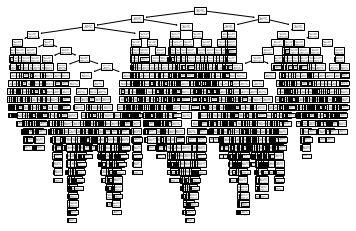

In [208]:
#Build decision tree with max depth 50
from sklearn import tree, metrics
entr_model = tree.DecisionTreeClassifier(max_depth= 50)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
pd.Series(y_pred)
tree.plot_tree(entr_model)

In [209]:
#Accuracy for Decision Tree
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8513457556935817


MODELING

In [210]:
from sklearn.model_selection import cross_val_score
cv_logreg = cross_val_score(model, X_train, y_train, cv=5)
print(cv_logreg)

[0.8757764  0.8797693  0.87267081 0.88598048 0.8797693 ]


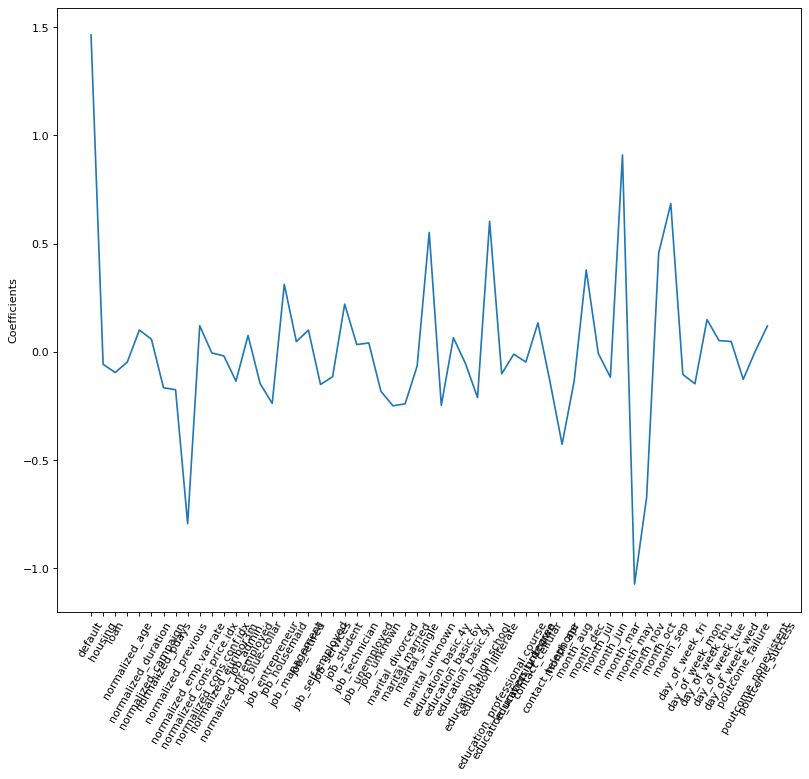

In [211]:
#check regression coefficients
from matplotlib.pyplot import figure
figure(figsize=(12, 10), dpi=80)
names= df1.columns
logreg_coef = model.fit(X_train, y_train).coef_
_ = plt.plot(range(len(names)), np.reshape(logreg_coef, -1))
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

SINCE LOGISTIC REGRESSION, DECISION TREE AND RANDOM FOREST MODELS ARE GIVING THE HIGHEST ACCURACY, WILL FOCUS ON THOSE MODELS.

In [212]:
#Using grid search and fine tune parameters in logistic regression
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.1, 1, 10, 100]}
logreg = LogisticRegression (max_iter=1000)
cv = GridSearchCV(logreg, param_grid = parameters, cv= 5)
cv.fit(X_train, y_train)
y_predict = cv.predict(X_test)
score= accuracy_score(y_test, y_predict)
print(cv.best_params_, score)

{'C': 0.1} 0.8768115942028986


In [213]:
#Computing accuracy of training and test data for logistic regression after hyperparameter tuning
training_accuracy = cv.score(X_train, y_train)
test_accuracy = cv.score(X_test, y_test)
print("Accuracy on training data: {:0.2f}".format(training_accuracy))
print("Accuracy on test data:     {:0.2f}".format(test_accuracy))

Accuracy on training data: 0.88
Accuracy on test data:     0.88


30


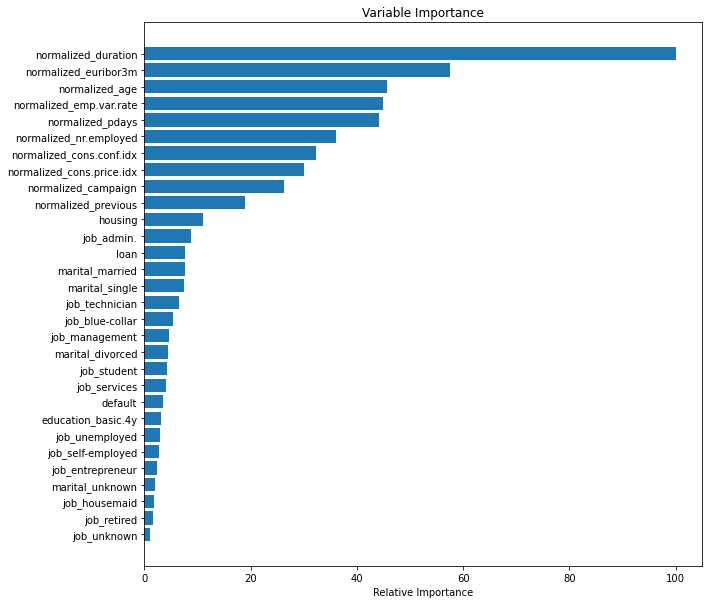

In [214]:
#Random forest feature importances

feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df1.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


In [215]:
#Hyperparameter tuning in Random forest classifier
#First use Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 300, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [216]:
# Use the random grid to search for best hyperparameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 275,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [217]:
#check accuracy with new parameters
clf_hyp = RandomForestClassifier(n_estimators= 200,
 min_samples_split= 2,
 min_samples_leaf= 4,
 max_features= 'auto',
 max_depth= 10,
 bootstrap= True, random_state= 42)

model_res1 = clf_hyp.fit(X_train, y_train)
y_pred = model_res1.predict(X_test)
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))
print("Confusion matrix")
print(cm)

Random Forest: Accuracy=0.892
Random Forest: f1-score=0.859
Confusion matrix
[[4210   26]
 [ 497   97]]


In [218]:
#Use Grid Search CV to tune parameters 

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 15, 20, 25],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [1, 2, 4],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf_grid = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [219]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


C:\Users\rsaha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.10799175 0.11216006
 0.11082637 0.11105491 0.10844369 0.10944737 0.11022629 0.10950824
        nan        nan        nan        nan 0.10931047 0.11038416
 0.11007442 0.11002517 0.11113429 0.10677507 0.10837087 0.10865663
        nan        nan        nan        nan 0.10976524 0.11140677
 0.10834258 0.10998001 0.10589188 0.1093217  0.11000338 0.10864465
        nan        nan        nan        nan 0.13695386 0.13598973
 0.13762353 0.13647665 0.12866419 0.13598297 0.13816856 0.13606274
        nan        nan        nan        nan 0.13847472 0.13274592
 0.13519082 0.13684305 0.13715097 0.13403257 0.13479555 0.13502322
        nan        nan        nan        nan 0.13270746 0.13396802
 0.13547462 0.1354347  0.1332073  0.13341262 0.13551621 0.13620121
        nan        nan        nan        nan 0.156712

{'bootstrap': True,
 'max_depth': 25,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [220]:
#Check accuracy using new parameters
clf_hyp_grid = RandomForestClassifier(n_estimators= 200,
 min_samples_split= 4,
 min_samples_leaf= 3,
 max_features= 4,
 max_depth= 20,
 bootstrap= True, random_state= 42)

model_res2 = clf_hyp_grid.fit(X_train, y_train)
y_pred = model_res2.predict(X_test)
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))
print("Confusion matrix")
print(cm)

Random Forest: Accuracy=0.891
Random Forest: f1-score=0.860
Confusion matrix
[[4204   32]
 [ 493  101]]


30


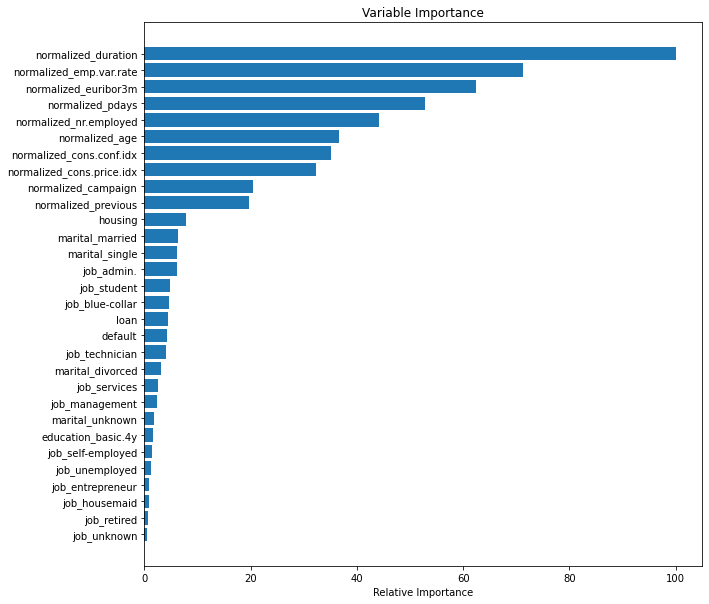

In [221]:
#Random forest feature importances

feature_importance = clf_hyp_grid.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df1.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [222]:
#Using grid search CV and hyperparameter tuning on decision tree classifier

decision_tree_hyper = tree.DecisionTreeClassifier()
params = {'criterion':['gini', 'entropy'], 'max_depth': range(10, 100, 10), 
          'min_samples_split': range(1, 10), 'min_samples_leaf': range(1, 5)}

grid = GridSearchCV(decision_tree_hyper, param_grid= params, cv=10, verbose=1, n_jobs=-1)

grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


C:\Users\rsaha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.88216504 0.88163265 0.88127773 0.88163265 0.88189885
 0.88110027 0.8823425  0.88127773        nan 0.88021295 0.88101154
 0.88154392 0.881189   0.88225377 0.88145519 0.88189885 0.88101154
        nan 0.87985803 0.88021295 0.87959184 0.87941437 0.88056788
 0.87994676 0.88056788 0.87994676        nan 0.88127773 0.87950311
 0.88021295 0.8809228  0.88189885 0.881189   0.88110027 0.88101154
        nan 0.85368234 0.85607808 0.85785271 0.85971606 0.86024845
 0.86024845 0.86255546 0.86370896        nan 0.86122449 0.86246673
 0.86282165 0.86202307 0.86264419 0.86433008 0.86317657 0.86708075
        nan 0.86282165 0.86291038 0.86078083 0.86166815 0.86317657
 0.86566105 0.86530612 0.86796806        nan 0.87054126 0.86947649
 0.87027507 0.87116238 0.87062999 0.86938776 0.87107365 0.87160603
        nan 0.85146406 0.85572316 0.85732032 0.856255

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [232]:
grid_best = grid.best_estimator_
y_pred = grid_best.predict(X_test)

#Accuracy for grid search Decision Tree
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8855072463768116


In [233]:
#Predictions on test data: test.csv
df_test= pd.read_csv('test.csv')
df_test.head()

,RecordID,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,14664,37,technician,single,professional.course,no,yes,yes,cellular,aug,mon,3309,1,471,0,success,1.4,92.325519,-33.010270,3.562675,5028.544435
1,25250,26,admin.,single,high.school,no,yes,no,cellular,may,thu,2757,2,159,2,success,-1.8,92.591695,-46.129934,3.294182,5025.294022
2,4070,42,blue-collar,married,basic.6y,no,no,no,telephone,may,mon,266,3,999,0,nonexistent,1.1,93.994000,-36.400000,4.857000,5191.000000
3,19446,38,blue-collar,married,basic.9y,no,yes,no,telephone,nov,thu,29,1,433,5,success,-0.1,92.752588,-41.837090,3.318768,5111.327469
4,5111,43,blue-collar,married,basic.4y,no,yes,no,telephone,may,thu,1684,2,938,3,success,1.1,93.983679,-35.267269,3.833161,5183.822823


In [234]:
#Check test data for null values
df_test.isna().sum()

RecordID          0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [235]:
#Check test data for unique values
print(df_test.nunique())

RecordID          7500
age                 81
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          2708
campaign            55
pdays              960
previous             7
poutcome             3
emp.var.rate        10
cons.price.idx    3053
cons.conf.idx     3053
euribor3m         3253
nr.employed       3038
dtype: int64


In [236]:
#Change 'yes' and 'no'  to '1' and '0'
df_test.housing = df_test.housing.map(map_yn)
df_test.loan = df_test.loan.map(map_yn)
df_test.default = df_test.default.map(map_yn)

In [237]:
#Check null values
df_test.isna().sum()

RecordID             0
age                  0
job                  0
marital              0
education            0
default           1597
housing            300
loan               306
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

In [238]:
df_test.count()

RecordID          7500
age               7500
job               7500
marital           7500
education         7500
default           5903
housing           7200
loan              7194
contact           7500
month             7500
day_of_week       7500
duration          7500
campaign          7500
pdays             7500
previous          7500
poutcome          7500
emp.var.rate      7500
cons.price.idx    7500
cons.conf.idx     7500
euribor3m         7500
nr.employed       7500
dtype: int64

In [239]:
#drop null values
df_test.dropna(inplace= True)

In [240]:
#count the total rows
df_test.count()

RecordID          5626
age               5626
job               5626
marital           5626
education         5626
default           5626
housing           5626
loan              5626
contact           5626
month             5626
day_of_week       5626
duration          5626
campaign          5626
pdays             5626
previous          5626
poutcome          5626
emp.var.rate      5626
cons.price.idx    5626
cons.conf.idx     5626
euribor3m         5626
nr.employed       5626
dtype: int64

In [241]:
#drop column 'RecordID'
df_test.drop(columns= 'RecordID', inplace= True)

In [242]:
#Standardize all continuous numeric variables

scaler.fit(df_test[['age']])
df_test['normalized_age'] = scaler.transform(df_test[['age']])
df_test.drop(columns= 'age', inplace= True)
scaler.fit(df_test[['duration']])
df_test['normalized_duration'] = scaler.transform(df_test[['duration']])
df_test.drop(columns= 'duration', inplace= True)
scaler.fit(df_test[['campaign']])
df_test['normalized_campaign'] = scaler.transform(df_test[['campaign']])
df_test.drop(columns= 'campaign', inplace= True)
scaler.fit(df_test[['pdays']])
df_test['normalized_pdays'] = scaler.transform(df_test[['pdays']])
df_test.drop(columns= 'pdays', inplace= True)
scaler.fit(df_test[['previous']])
df_test['normalized_previous'] = scaler.transform(df_test[['previous']])
df_test.drop(columns= 'previous', inplace= True)
scaler.fit(df_test[['emp.var.rate']])
df_test['normalized_emp.var.rate'] = scaler.transform(df_test[['emp.var.rate']])
df_test.drop(columns= 'emp.var.rate', inplace= True)
scaler.fit(df_test[['cons.price.idx']])
df_test['normalized_cons.price.idx'] = scaler.transform(df_test[['cons.price.idx']])
df_test.drop(columns= 'cons.price.idx', inplace= True)
scaler.fit(df_test[['cons.conf.idx']])
df_test['normalized_cons.conf.idx'] = scaler.transform(df_test[['cons.conf.idx']])
df_test.drop(columns= 'cons.conf.idx', inplace= True)
scaler.fit(df_test[['euribor3m']])
df_test['normalized_euribor3m'] = scaler.transform(df_test[['euribor3m']])
df_test.drop(columns= 'euribor3m', inplace= True)
scaler.fit(df_test[['nr.employed']])
df_test['normalized_nr.employed'] = scaler.transform(df_test[['nr.employed']])
df_test.drop(columns= 'nr.employed', inplace= True)
df_test.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,normalized_age,normalized_duration,normalized_campaign,normalized_pdays,normalized_previous,normalized_emp.var.rate,normalized_cons.price.idx,normalized_cons.conf.idx,normalized_euribor3m,normalized_nr.employed
0,technician,single,professional.course,0.0,1.0,1.0,cellular,aug,mon,success,-0.228015,1.527680,-0.404851,-0.912070,-0.697850,0.909802,-1.794082,1.199603,0.219968,-1.282371
1,admin.,single,high.school,0.0,1.0,0.0,cellular,may,thu,success,-1.206924,1.136634,-0.211646,-1.859400,0.343695,-1.087290,-1.388534,-1.068725,0.054022,-1.322053
2,blue-collar,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,nonexistent,0.216943,-0.628028,-0.018441,0.691104,-0.697850,0.722575,0.748035,0.613535,1.019940,0.700963
3,blue-collar,married,basic.9y,0.0,1.0,0.0,telephone,nov,thu,success,-0.139024,-0.795922,-0.404851,-1.027450,1.906013,-0.026335,-1.143396,-0.326512,0.069218,-0.271717
4,blue-collar,married,basic.4y,0.0,1.0,0.0,telephone,may,thu,success,0.305935,0.376505,-0.211646,0.505889,0.864468,0.722575,0.732310,0.809379,0.387144,0.613341


In [243]:
#change all categorical values to 1 and 0 using pandas get_dummies function
df_test= pd.get_dummies(df_test, dtype='int64')
df_test.head()

,default,housing,loan,normalized_age,normalized_duration,normalized_campaign,normalized_pdays,normalized_previous,normalized_emp.var.rate,normalized_cons.price.idx,normalized_cons.conf.idx,normalized_euribor3m,normalized_nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,1.0,1.0,-0.228015,1.527680,-0.404851,-0.912070,-0.697850,0.909802,-1.794082,1.199603,0.219968,-1.282371,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0.0,1.0,0.0,-1.206924,1.136634,-0.211646,-1.859400,0.343695,-1.087290,-1.388534,-1.068725,0.054022,-1.322053,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,0.0,0.0,0.0,0.216943,-0.628028,-0.018441,0.691104,-0.697850,0.722575,0.748035,0.613535,1.019940,0.700963,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0.0,1.0,0.0,-0.139024,-0.795922,-0.404851,-1.027450,1.906013,-0.026335,-1.143396,-0.326512,0.069218,-0.271717,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,0.0,1.0,0.0,0.305935,0.376505,-0.211646,0.505889,0.864468,0.722575,0.732310,0.809379,0.387144,0.613341,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [244]:
y_df_test_pred= model_res1.predict(df_test)

In [245]:
num_zeros = (y_df_test_pred == 0).sum()
num_ones = (y_df_test_pred == 1).sum()
print("Percentage of subscribers: ", (num_ones/(num_zeros + num_ones))*100)

Percentage of subscribers:  2.02630643441166


In [246]:
print("Subscribers: ", num_ones)
print("Not subscribers: ", num_zeros)

Subscribers:  114
Not subscribers:  5512


Out of 5625 possible subscribers, the model predicts 114 members will subscribe which is 2.03%.